In [5]:
# --- Core Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Settings ---
sns.set_style('whitegrid')

# --- Data Loading ---
file_path = '../data/predictive_maintenance.csv'
df_maint = pd.read_csv(file_path)

In [7]:
df_maint.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
# --- 3.1 Data Schema and Null Check ---
print("--- Data Info ---")
df_maint.info()

print("\n--- Null Value Check ---")
print(df_maint.isnull().sum())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB

--- Null Value Check ---
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature 

In [6]:
df_maint_cleaned = df_maint.drop(["UDI", "Product ID"], axis=1)

In [8]:
# --- 3.3 Target Variable Analysis (Class Imbalance) ---
# Este es el análisis más crítico de este bloque.
print("\n--- Target Variable Distribution ---")
target_counts = df_maint_cleaned['Target'].value_counts()
print(target_counts)


--- Target Variable Distribution ---
Target
0    9661
1     339
Name: count, dtype: int64


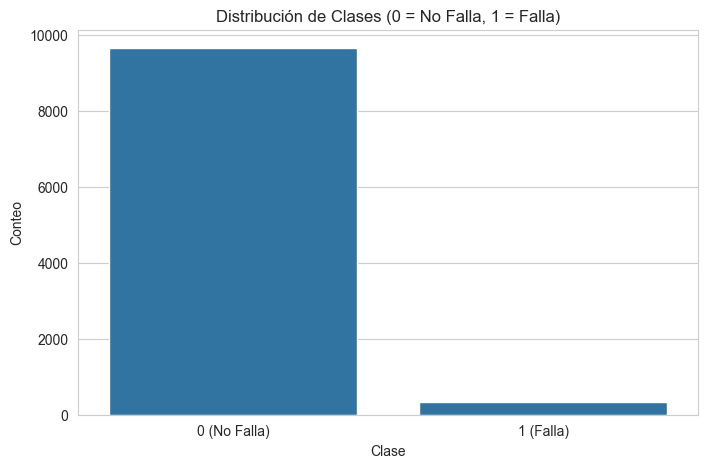

In [9]:
# Visualización del desbalance
plt.figure(figsize=(8, 5))
# Usar value_counts().index para asegurar el orden correcto en el plot
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribución de Clases (0 = No Falla, 1 = Falla)')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.xticks([0, 1], ['0 (No Falla)', '1 (Falla)'])
plt.show()

In [10]:
# Calcular el porcentaje de desbalance
failure_rate = (target_counts[1] / target_counts.sum()) * 100
print(f"\nPorcentaje de Fallas (Clase 1): {failure_rate:.2f}%")


Porcentaje de Fallas (Clase 1): 3.39%
